In [1]:
%load_ext autoreload
%autoreload 1
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
savePNG = False ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExtension = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExtension = str('.pdf')

notebookPlotFlag = False ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
## original data with least_squares
tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2].reset_index(drop=True)
tess_2020bpi_norm = normLC(tess_2020bpi)
#tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 0.4*np.max(tess_2020bpi['flux'])
print(fluxNorm)
#tess_2020bpi.head()
## Fausnaugh Updated Data with least_squares
tess_2020bpi_a = pd.read_csv('JhaData/TESS_SN2020bpi_updated.csv')
tess_2020bpi_a_norm = normLC(tess_2020bpi_a)

## Original Data with MCMC (only sector21)
tess_2020bpi_s21_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_MCMC.csv')
tess_2020bpi_s21_mcmc_norm = normLC(tess_2020bpi_s21_mcmc)

## Fausnaugh Updated Data with MCMC (only sector21)
tess_2020bpi_s21_a_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
tess_2020bpi_s21_a_mcmc_norm = normLC(tess_2020bpi_s21_a_mcmc)
# tess_2020bpi_s21_a_mcmc_norm_smol = tess_2020bpi_s21_a_mcmc_norm.copy()
# tess_2020bpi_s21_a_mcmc_norm_smol['flux_roll'] = tess_2020bpi_s21_a_mcmc_norm_smol['flux'].rolling(24).median()
# tess_2020bpi_s21_a_mcmc_norm_smol = tess_2020bpi_s21_a_mcmc_norm_smol.query('flux_roll < 1')

##ZTF Data
ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
ztf_2020bpi['e_flux_tuple'] = ztf_2020bpi['e_flux']
ztf_2020bpi['e_flux'] = [
    np.mean(ast.literal_eval(flux))
    for flux in ztf_2020bpi['e_flux'].to_numpy()
                        ]

0.05428581325102484


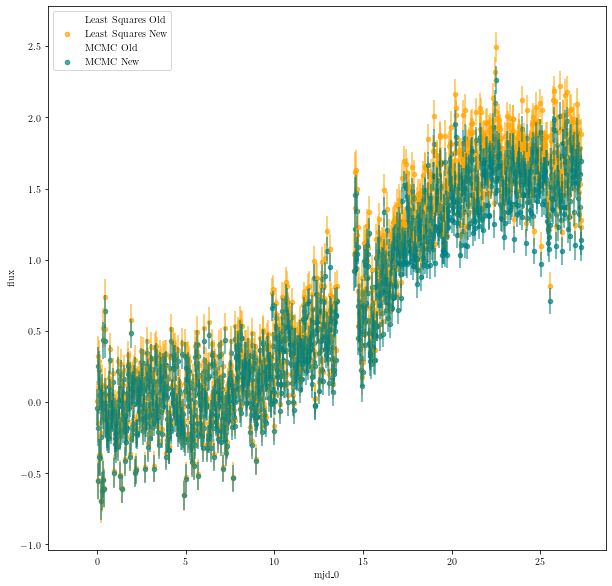

In [8]:
ax = tess_2020bpi_norm.plot('mjd_0','flux',yerr='e_flux',color='black',alpha=0.0,kind='scatter',figsize=(10,10),label='Least Squares Old')
tess_2020bpi_a_norm.plot('mjd_0','flux',yerr='e_flux',color='orange',alpha=0.7,kind='scatter',ax=ax,label='Least Squares New')
tess_2020bpi_s21_mcmc_norm.plot('mjd_0','flux',yerr='e_flux',color='red',alpha=0.0,kind='scatter',ax=ax,label='MCMC Old')
tess_2020bpi_s21_a_mcmc_norm.plot('mjd_0','flux',yerr='e_flux',color='teal',alpha=0.7,kind='scatter',ax=ax,label='MCMC New')
ax.set_xlim(right=1.05*tess_2020bpi_s21_mcmc_norm['mjd_0'].max())
ax.set_xlabel(r'mjd\_0');


In [4]:
# ax = tess_2020bpi_norm.plot(x='mjd_0',y='flux',yerr='e_flux',kind='scatter',color='blue',label='original corrected',alpha=0.35)
# tess_2020bpi_a_norm.plot(x='mjd_0',y='flux',yerr='e_flux',kind='scatter',color='red',alpha=0.25,label='new corrected',ax=ax)
# ax.set_xlim(0,17)

# ax1 = tess_2020bpi_norm.plot(x='mjd_0',y='raw_flux',yerr='e_raw_flux',kind='scatter',color='blue',label='original raw',alpha=0.35)
# tess_2020bpi_a_norm.plot(x='mjd_0',y='raw_flux',yerr='e_raw_flux',kind='scatter',color='red',alpha=0.25,label='new raw',ax=ax1)
# ax1.set_xlim(0,17)
# print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.std(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.std()])
# print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.std(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.std()])
# print()
# print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.mean(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.mean()])
# print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.mean(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.mean()])
# print()
# print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.median(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.median()])
# print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.median(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.median()])
# fig, ax2 = plt.subplots()
# ax2.errorbar(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.raw_flux-tess_2020bpi_a_norm.raw_flux),yerr=np.sqrt(tess_2020bpi_norm.e_raw_flux**2 + tess_2020bpi_a_norm.e_raw_flux**2),
#              color='red',marker='o',markersize=1,linestyle='none',ecolor='maroon',label='raw')
# ax2.errorbar(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.flux-tess_2020bpi_a_norm.flux),yerr=np.sqrt(tess_2020bpi_norm.e_flux**2 + tess_2020bpi_a_norm.e_flux**2),
#              color='lightblue',marker='o',markersize=1,linestyle='none',ecolor='blue',label='corrected')
# ax2.set_xlabel('Time since start of TESS sector 21 (mjd-58870)')
# ax2.set_ylabel('Difference between old and new data')
# ax2.legend()
# #ax2.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.raw_flux-tess_2020bpi_a_norm.raw_flux),color='red')
# ax2.set_xlim(0,17)
# print([len(tess_2020bpi_a_norm.raw_flux),len(tess_2020bpi_a_norm.e_raw_flux**2)])

# fig,ax3 = plt.subplots()
# ax3.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.e_raw_flux-tess_2020bpi_a_norm.e_raw_flux),
#              color='red',s=1,label='raw')
# ax3.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.e_flux-tess_2020bpi_a_norm.e_flux),
#              color='blue',s=1,label='corrected')
# ax3.set_xlabel('Time since start of TESS sector 21 (mjd-58870)')
# ax3.set_ylabel('Difference between old and new errors')
# ax3.legend()
# ax3.set_xlim(0,17)

sampling...



done


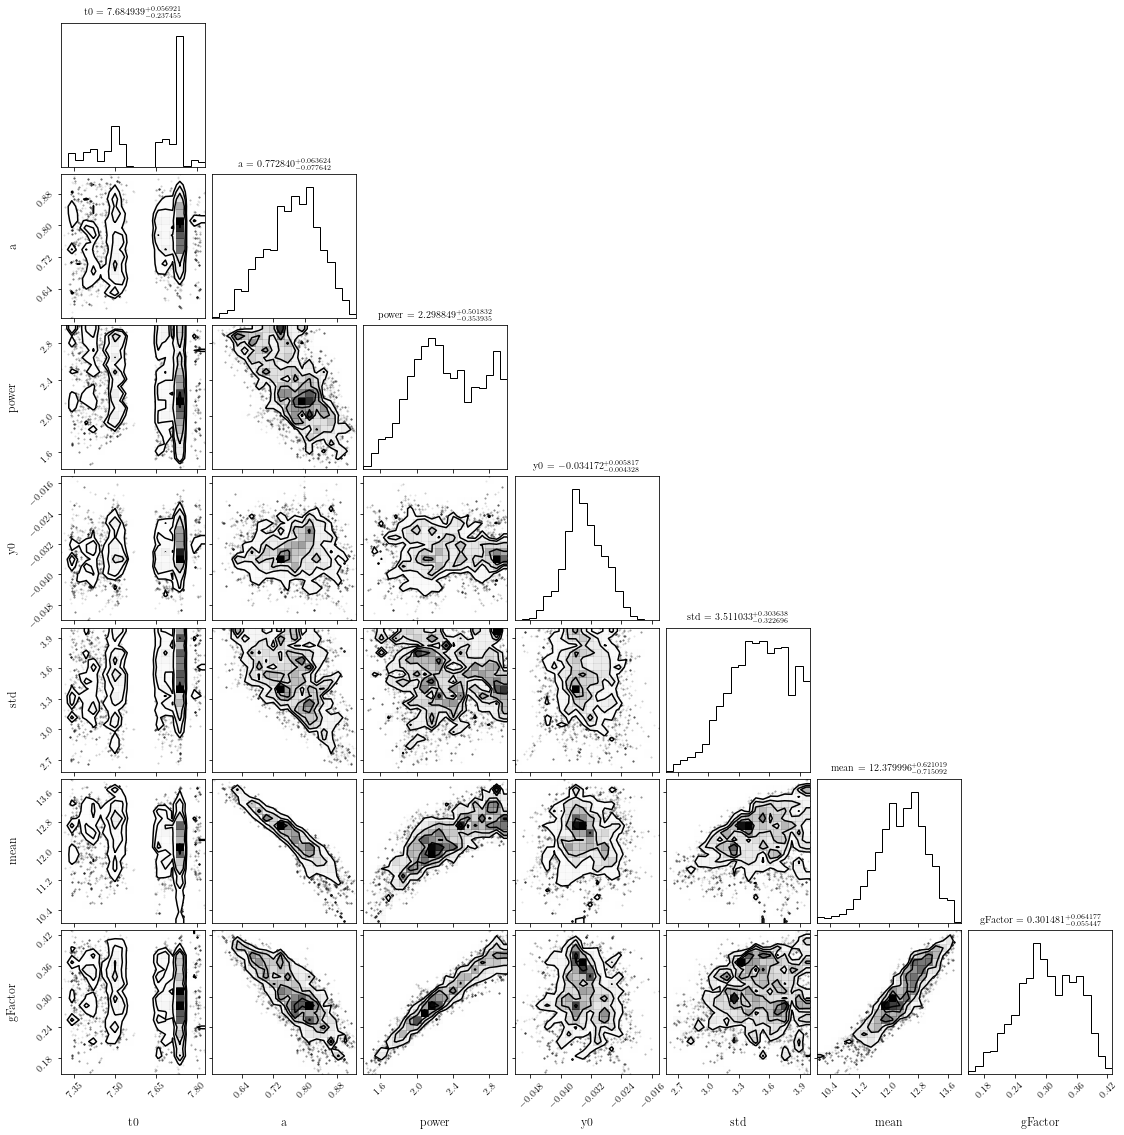

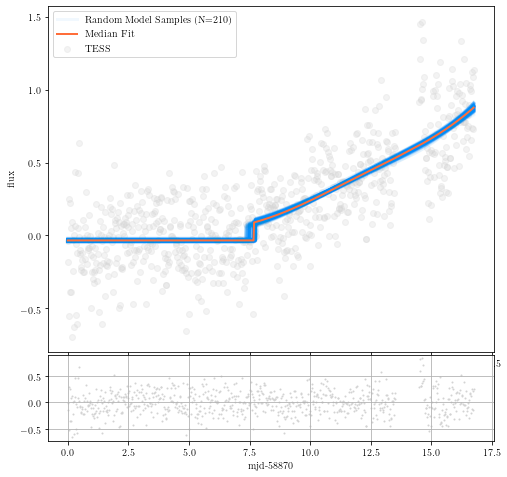

In [13]:
## made power limit 1-3, made bounds on mean  from t0-t0+5
guess = {'t0':7, 'a':1,'power':2,'y0':-0.01,'std':3,'mean':11,'gFactor':0.2} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01,'std':0.2,'mean':0.2,'gFactor':0.07}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=14,nburn=14000,nsteps=15000,
                            curveModel='dcGauss', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));